# Módulo 2 - Actividad 04

### FLAVIO MAXIMLIANO HERRADA AVALOS

El objetivo de la actividad es implementar una clase llamada MLP que nos permita crear una red neuronal tipo perceptrón multicapa (forward pass) tomando como base la capa FCLayer que implementamos durante la sesión.

La clase MLP, debería poder ser utilizada de la siguiente forma:

myNN = MLP([layer_01, layer_02, layer_03, ..., layer_N])

output_tensor = myNN(input_tensor)

Al finalizar, prueba tu implementación construyendo la siguiente red neuronal:

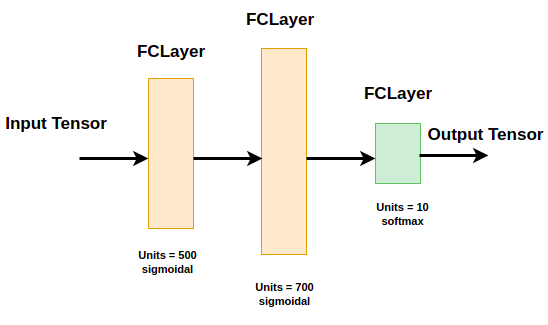

In [1]:
import tensorflow as tf
import numpy as np

# Clase FCLayer vista en Clase
class FCLayer():

  # Inicialización del perceptrón
  def __init__(self, units, w_init = tf.initializers.GlorotUniform(1), activation=tf.identity):
    self.output_dim = units
    self.w_init = w_init
    self.activation=activation
    self.built = False

  #Invocación de la capa
  def __call__(self, x):
    if not self.built:
      self.input_dim = x.shape[1]
      self.w = tf.Variable(self.w_init(shape=(self.input_dim, self.output_dim)))
      self.b = tf.Variable(tf.ones(shape=(self.output_dim, )))
      self.built = True


    # Forward
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

In [2]:
# Clase Multicapa
class MLP():
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers: # Multicapa
            x = layer(x)
        return x

Posteriormente, probemos la red neuronal (forward pass) con los siguientes tensores de entrada:

- Input tensor: (1, 100)
- Input tensor: (10, 32, 32, 1)
- Input tensor: (20, 5)

En todos los casos , la salida esperada es un tensor 2D: (M, ndim).

In [3]:
# Tensores de entrada
input_tensor1 = tf.constant(np.random.rand(1, 100).astype(np.float32))
input_tensor2 = tf.constant(np.random.rand(10, 32, 32, 1).astype(np.float32))
input_tensor3 = tf.constant(np.random.rand(20, 5).astype(np.float32))

# Tensores de entrada aplanados
input_tensor1_flattened = tf.reshape(input_tensor1, [-1, 1*100])
input_tensor2_flattened = tf.reshape(input_tensor2, [-1, 32*32*1])
input_tensor3_flattened = input_tensor3

In [4]:
# Capas red neuronal 1
layer_01 = FCLayer(units=5, activation=tf.nn.sigmoid)
layer_02 = FCLayer(units=2, activation=tf.nn.sigmoid)
layer_03 = FCLayer(units=1, activation=tf.nn.sigmoid)

mlp_layers = [layer_01, layer_02, layer_03]

myNN = MLP(mlp_layers)

output_tensor1 = myNN(input_tensor1)

print("Tensor:\n", output_tensor1)

Tensor:
 tf.Tensor([[0.8363461]], shape=(1, 1), dtype=float32)


In [5]:
# Capas red neuronal 2
layer_01 = FCLayer(units=5, activation=tf.nn.relu)
layer_02 = FCLayer(units=6, activation=tf.nn.relu)

mlp_layers = [layer_01, layer_02]

myNN = MLP(mlp_layers)

output_tensor2 = myNN(input_tensor2_flattened)
print("Tensor:\n", output_tensor2)


Tensor:
 tf.Tensor(
[[0.8645992  1.2702497  1.0010967  0.670022   0.05776858 0.99184513]
 [1.1433792  1.3941084  0.7247663  1.0819694  0.         0.9750129 ]
 [1.5214356  1.1791207  1.1033735  0.6025129  0.49533254 1.0383009 ]
 [1.6478283  1.1821923  1.1252108  0.845012   0.         0.8143938 ]
 [1.7474766  0.82040656 1.5434228  0.62388337 0.         0.7485319 ]
 [1.6050079  1.2207376  1.0512385  0.8532844  0.         0.8771255 ]
 [1.3485758  1.1131299  1.2158822  0.6974044  0.6207484  1.0359144 ]
 [1.5460066  1.279122   1.0454113  0.5230386  0.17289597 1.029013  ]
 [1.3129172  1.1203424  1.1133404  0.89000726 0.00313354 0.8902234 ]
 [1.3665868  0.8230462  1.6262515  0.41142923 0.23025942 0.8634123 ]], shape=(10, 6), dtype=float32)


In [6]:
# Capas red neuronal 3
layer_01 = FCLayer(units=16, activation=tf.nn.relu)
layer_02 = FCLayer(units=10, activation=tf.nn.relu)
layer_03 = FCLayer(units=8, activation=tf.nn.sigmoid)
layer_04 = FCLayer(units=4, activation=tf.nn.sigmoid)

mlp_layers = [layer_01, layer_02, layer_03, layer_04]

myNN = MLP(mlp_layers)

output_tensor3 = myNN(input_tensor3_flattened)
print("Tensor:\n", output_tensor3)


Tensor:
 tf.Tensor(
[[0.6287342  0.76104635 0.71014845 0.7173857 ]
 [0.6264125  0.7619491  0.7054635  0.7168375 ]
 [0.63287044 0.7633179  0.70566905 0.7195038 ]
 [0.6320248  0.75862396 0.71408385 0.71085995]
 [0.6341879  0.76487875 0.70565665 0.71636844]
 [0.62601495 0.76450133 0.6997126  0.7182746 ]
 [0.6272642  0.7636     0.70074856 0.7233367 ]
 [0.6299376  0.7645556  0.70402735 0.7172415 ]
 [0.6367048  0.76665413 0.7048064  0.70945364]
 [0.63255537 0.7606763  0.7134078  0.71304274]
 [0.63089484 0.7623434  0.70573825 0.7191569 ]
 [0.632706   0.767986   0.7002573  0.7186377 ]
 [0.62826693 0.7652415  0.7003125  0.7229616 ]
 [0.6299064  0.7650062  0.70088094 0.71806616]
 [0.63456565 0.76271653 0.7122651  0.7107003 ]
 [0.64022154 0.765765   0.71098524 0.7080492 ]
 [0.6257849  0.7660807  0.6958686  0.7269322 ]
 [0.6400002  0.76615524 0.7102256  0.7117044 ]
 [0.6330704  0.76335245 0.7069705  0.71342546]
 [0.62882555 0.7637187  0.70458287 0.7202402 ]], shape=(20, 4), dtype=float32)
